# <center> Musicología Computacional en Python <center>

# Representaciones simbólicas de la música

## La partitura
Para los propósitos de éste curso, usaremos diferentes representaciones de *items* musicales que puedan ser procesados y analizados computacionalmente. Antes de ver métodos particulares, es necesario conocer conceptos básicos relacionados con tales items. De todas las representaciones simbólicas, la más conocida es la partitura:

![Fig](https://upload.wikimedia.org/wikipedia/commons/2/22/MozartExcerptK331.png)

Mozart Piano Sonata No. 11 K. 331

Las partituras contienen notas. Una nota es un *símbolo musical* que tiene varias propiedades como la tonalidad, el timbre, el volúmen y la duración, entre otros. 

Veremos algunos conceptos sobre éstas propiedades y algunas otras, que son necesarias para entender lo que haremos posteriormente con la modalidad de información acústica de items musicales. En este curso, usaremos la **notación musical tradicional occidental**, que consiste en una serie de *letras y accidentales*. 

Consideraremos también la llamada **escala de 12 tonos igualmente temperada**.

![figure](figs/music1.png)

- **Tonalidad** ([Wikipedia](https://en.wikipedia.org/wiki/Pitch_(music))).

  Es una propiedad perceptual que indica cuán "aguda" o "grave" suena una nota. El tono está estrechamente relacionado con la frecuencia fundamental de la nota, aunque esta es una propiedad física de la onda sonora.

- Una **octava** ([Wikipedia](https://en.wikipedia.org/wiki/Octave)).

  Es un intervalo entre dos notas donde la nota más aguda tiene el doble de la frecuencia fundamental de la nota más grave. Por ejemplo, un A (La) a 440 Hz y un A a 880 Hz están separados por una octava. Aquí hay dos Do separados por una octava:

  ![fig](https://upload.wikimedia.org/wikipedia/commons/a/a5/Perfect_octave_on_C.png)

- **Clase de tonalidad** ([Wikipedia](https://en.wikipedia.org/wiki/Pitch_class))
- 
  Es el conjunto de todas las notas separadas por un número entero de octavas. Por ejemplo, el conjunto de todos los C's, {..., C1, C2, ...} es una clase de altura, y el conjunto de todos los D, {..., D1, D2, ...} es otra clase de altura. Aquí está la clase de altura para C:

  ![Fig](https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Pitch_class_on_C.png/187px-Pitch_class_on_C.png)

- **Temperamento igual** ([Wikipedia](https://en.wikipedia.org/wiki/Equal_temperament))

  Se refiere a la práctica estándar de dividir la octava en 12 pasos de escala uniformes.

  La diferencia entre dos pasos de escala consecutivos se denomina **semitono** ([Wikipedia](https://en.wikipedia.org/wiki/Semitone)), y es el intervalo más pequeño posible en la escala de doce tonos de temperamento igual. Los músicos suelen conocerlo como "medio paso".

- La **armadura**  ([Wikipedia](https://en.wikipedia.org/wiki/Key_signature))

  Se coloca después de la clave en un pentagrama e indica la tonalidad de la pieza mediante los sostenidos o bemoles presentes a lo largo de la misma. En el fragmento de sonata de Mozart mencionado anteriormente, la armadura de clave es La mayor.

- El **compás** ([Wikipedia](https://en.wikipedia.org/wiki/Time_signature))

  Sigue a la armadura de clave en el pentagrama e indica la estructura rítmica, o métrica de la pieza. En el fragmento de sonata de Mozart mencionado anteriormente, el compás es 6/8, es decir, seis corcheas (de 1/8) en un compás.

- **Tempo** ([Wikipedia](https://en.wikipedia.org/wiki/Tempo))

  Indica la lentitud o rapidez con la que se toca una pieza, medida en pulsaciones por minuto (PPM). En el fragmento de sonata de Mozart mencionado anteriormente, el tempo es «Andante grazioso».

## Lo que usaremos:

### `music21` -- A Toolkit for Computational Musicology

[Documentación oficial](https://www.music21.org/music21docs/)

Cuthbert, Michael Scott Cuthbert and Christopher Ariza. 2010. “music21: A Toolkit for Computer-Aided Musicology and Symbolic Music Data.” In Proceedings of the International Society for Music Information Retrieval. https://www.academia.edu/243058/music21_A_Toolkit_for_Computer-Aided_Musicology_and_Symbolic_Music_Data

"Music21 is a Python-based toolkit for computer-aided musicology.
People use music21 to answer questions from musicology using computers, to study large datasets of music, to generate musical examples, to teach fundamentals of music theory, to edit musical notation, study music and the brain, and to compose music (both algorithmically and directly)."

`music21` puede importar y exportar muchos formatos de datos musicales. También puede visualizar símbolos y en general, partituras de música. Para realizarlo, generalmente se usa un programa externo y debe configurarse. En estos ejemplo, yo usé `MuseScore` (https://musescore.com), y las intrucciones para configurarlo en `music21` puedes encontrarlas en:

[Installing MusicXML](https://www.music21.org/music21docs/usersGuide/usersGuide_08_installingMusicXML.html#usersguide-08-installingmusicxml)

[Install music21](https://www.music21.org/music21docs/usersGuide/usersGuide_01_installing.html)
    
Si tienes dudas, pregúntame (espero saber las respuestas...)

## Conceptos básicos

### Notas 

En Music21, las notas son los elemeentos fundamentales, y están implementadas en la clase `Note` del módulo `note`.

In [2]:
import music21

music21.note
# ver los objetos y métodos del móduloNotas
dir(music21.note)

['GeneralNote',
 'Lyric',
 'LyricException',
 'NotRest',
 'NotRestException',
 'Note',
 'NoteException',
 'Rest',
 'SYLLABIC_CHOICES',
 'Unpitched',
 'noteheadTypeNames',
 'stemDirectionNames']

Creamos nuestra primera nota

In [9]:
my_note = music21.note.Note("C")
my_note
my_note.fullName

'C Quarter Note'

Elementos esenciales en una nota son la "altura" (pitch, o frecuencia audible) y duración, entre otros.
Por default, en `music21` las notas tienen la siguiente configuración:
- El constructor de la clase `Note` asigna la nota C (Do), si no se especifica alguna otra nota válida
- Se encuentran en la octava "centrada", es decir, C4 en notación estándar. La octava superior sería C5, etc...
- Su duración es $\frac{1}{4}$ de nota
- Los **silencios** tienen duración de $\frac{1}{4}$ (sin pitch)

Todos los elementos de las notas son elementos de la clase Note, entones pueden accederse y configurarse:

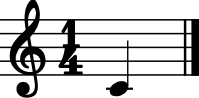

nombre: C
pitch: C
octava: None
duracion: quarter , quarter length: 1.0
completo: C Quarter Note


In [6]:
my_note.show()
print('nombre:',my_note.name)
print('pitch:',my_note.pitch)
print('octava:',my_note.octave)
print('duracion:',my_note.duration.type,', quarter length:',my_note.duration.quarterLength)
print('completo:',my_note.fullName)

Observa que, el `name` y `pitch` son lo mismo. Esto es porque el constructor de la clase `Note` recibe como primer argumento un pitch válido. Para efectos prácticos, el pitch representa una **frecuencia**, y cada nota tiene una frecuencia audible determinada. 

A#4


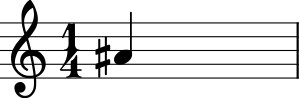

A-sharp in octave 4 Quarter Note
frecuencia: 466.1637615180899 Hz


In [18]:
# instanciamos un pitch
my_pitch = music21.pitch.Pitch('a#4')
print(my_pitch)
# ahora, instanciamos una nota:
my_note = music21.note.Note(my_pitch)
my_note.show()
print(my_note.fullName)
print('frecuencia:',my_pitch.frequency,'Hz')

Un pitch (en consecuencia, una nota), tiene una classe `Accidental`, para manejar la representación numérica y simbólica de la desviación de una nota *natural* dada (como C,D,F, etcétera).
Por ejemplo:

In [19]:
# descripcion completa del Accidental
my_pitch.fullName

'A-sharp in octave 4'

In [20]:
# elementos
print('name:',my_pitch.accidental.name,', modifier:', my_pitch.accidental.modifier, ', alter:',my_pitch.accidental.alter)

name: sharp , modifier: # , alter: 1.0


`name` y `modifier` son claros. `alter`, es el cambio en el semitono causado por la alteración `Accidental`.
Para que te sea más familiar:

In [21]:
print(my_note.pitch.unicodeName)
my_note.pitch.spanish

A♯


'la sostenido'

Podemos variar la octava y la duración:

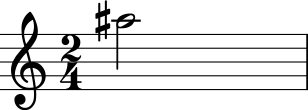

A-sharp in octave 5 Half Note
frecuencia: 932.3275230361803 Hz


In [22]:
my_note.octave = 5
my_note.duration.type = 'half'
my_note.show()
print(my_note.fullName)
print('frecuencia:',my_pitch.frequency,'Hz')

La duración la podemos dar en términos de cuartos de nota:

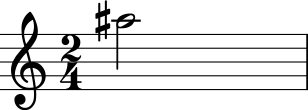

A-sharp in octave 5 Half Note
frecuencia: 932.3275230361803 Hz


In [23]:
my_note.octave = 5
my_note.duration.quarterLength = 2
my_note.show()
print(my_note.fullName)
print('frecuencia:',my_pitch.frequency,'Hz')

Si quieres especificar un bemol: (observa que el símbolo en python es '-')

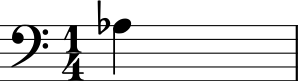

A-flat in octave 3 Quarter Note
A♭ : la bèmol
simbolo: - . Alteracion: -1.0
frecuencia: 207.65234878997245 Hz


In [24]:
my_note = music21.note.Note('a-3')
my_note.show()
print(my_note.fullName)
print(my_note.pitch.unicodeName,':',my_note.pitch.spanish)
print('simbolo:', my_note.pitch.accidental.modifier, '. Alteracion:', my_note.pitch.accidental.alter)
print('frecuencia:',my_note.pitch.frequency,'Hz')

### - Contenedores: Listas y Streams. 

En `music21`, se pueden utilizar listas de Python, pero el contenedor principal para almacenar objetos musicales (notas, acordes, entre otros) es la clase `Stream` del módulo `stream`.

En el siguiente ejemplo, verás el uso de
    - Listas
    - Streams
    - Lyrics: descripciones en notas, silencios o acordes.
    
Ejemplo: octava centrada.

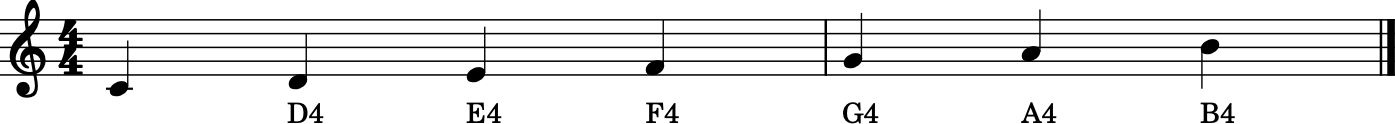

In [7]:
# instanciamos un objeto Stream
stream1 = music21.stream.Stream()
# creamos una lista de notas
noteList = [music21.note.Note('C4'), music21.note.Note('D4'), music21.note.Note('E4'), 
            music21.note.Note('F4'), music21.note.Note('G4'), music21.note.Note('A4'), music21.note.Note('B4')]
# le a~nado una descripcion
for notes in noteList[1:]:
    notes.addLyric(notes.nameWithOctave)   
    #notes.duration.type = 'half'

# llenamos el stream de notas con la lista creada
stream1.append(noteList)
stream1.show()
stream1.show('midi')

Lo anterior, nos sirve para ilustrar un concepto fundamental en música: la **escala**. 

En general, una escala musical es el *ordenamiento* de notas. En el caso de las escalas con temperamento igual, cuando se ordenan de acuerdo a su tonalidad, se obtiene la **escala cromática** 

![figure](figs/music2.png)
Escala cromática y la hélice de tonalidades (alturas o pitch) de Shepard

Ejemplo: octava 5

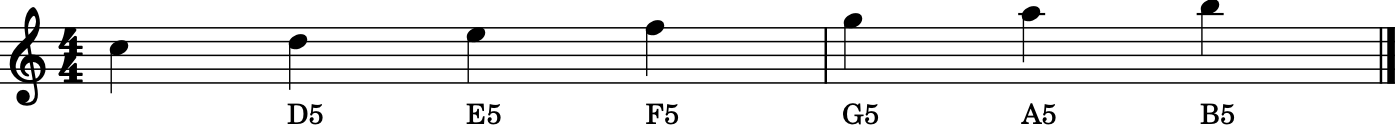

In [10]:
stream2 = music21.stream.Stream()
noteList = [music21.note.Note('C5'), music21.note.Note('D5'), music21.note.Note('E5'), 
            music21.note.Note('F5'), music21.note.Note('G5'), music21.note.Note('A5'), music21.note.Note('B5')]
for notes in noteList[1:]:
    notes.addLyric(notes.nameWithOctave)
    #notes.duration.type = 'whole'
    
stream2.append(noteList)
stream2.show()
stream2.show('midi')

También se pueden insertar o remover objetos directamente en el stream:

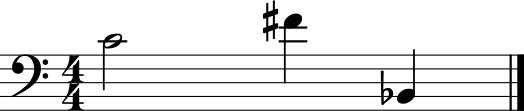

In [28]:
stream3 = music21.stream.Stream()
# creamos algunos objetos (silencio y notas)
s1 = music21.note.Rest(quarterLength = .25)
n1 = music21.note.Note('C4',quarterLength=2)
n2 = music21.note.Note("F#4")
n3 = music21.note.Note("B-2")

# los agregamos al stream
#stream3.append(s1)
stream3.append(n1)
stream3.append(n2)
stream3.append(n3)

stream3.show()
stream3.show('midi')

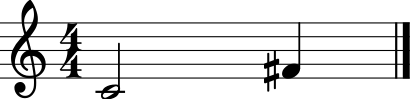

In [29]:
# quitamos la ultima nota, buscando el indice correspondiente
# tambien puede indicarse directamente, si se conoce cual es (iniciando en 0)
ind3 = stream3.index(n3)
ind3

stream3.pop(ind3)

stream3.show()
stream3.show('midi')

# de vuelta metemos la nota 3
stream3.append(n3)

* Acceso a elementos del stream. Se pueden acceder a varios elementos, por ejemplo:

In [30]:
# acceso a los elementos por clase. En este caso, la clase Note
for note_i in stream3.getElementsByClass(music21.note.Note):
    print(note_i, note_i.offset)    


<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


En el ejemplo anterior, se imprime el offset, que indica **la posición** de la nota en el stream pero en unidades de tiempo. Este tiempo generalmente se representa como a *cuántos cuartos de nota* a partir del inicio se encuentra la nota. Las posiciones están definidas según el **tiempo del compás**.

Esto es lo mismo para cualquier objeto en el stream (silencios, notas, etc...)

In [31]:
# acceso a los elementos por clase. En este caso, la clase Note y Rest (silencio)
for note_i in stream3.getElementsByClass(["Note", "Rest"]):
    print(note_i, note_i.offset)    


<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


In [32]:
# acceso a los elementos por clase Note y muestro el Pitch
for note_i in stream3.getElementsByClass(["Note"]):
    print(note_i, note_i.pitch)    
    
# o un poco diferente:
print('\n solo pitches:')
stream3.pitches

<music21.note.Note C> C4
<music21.note.Note F#> F#4
<music21.note.Note B-> B-2

 solo pitches:


[<music21.pitch.Pitch C4>,
 <music21.pitch.Pitch F#4>,
 <music21.pitch.Pitch B-2>]

Finalmente, la manera más general de mostrar el contenido del stream es con `show()`

In [33]:
stream3.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


Stream anidados

{0.0} <music21.note.Note D#>
{1.0} <music21.stream.Stream 0x7fc2ce9c8e20>
    {0.0} <music21.note.Note C>
    {2.0} <music21.note.Note F#>
    {3.0} <music21.note.Note B->


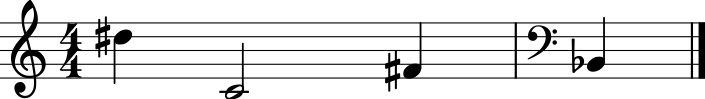

In [34]:
bigStream = music21.stream.Stream()
#bigStream.append(music21.note.Rest(quarterLength = .25))
bigStream.append(music21.note.Note("D#5"))
bigStream.append(stream3)
bigStream.show('text')
bigStream.show()
bigStream.show('midi')

### - Acordes

Un acorde es un conjunto armónico de tonos (pitches) que consisten en múltiples notas tocadas simultáneamente. 

Computacionalmente, en `music21`, son objetos de la clase `Pitch` en una tupla.  Están implementados en la clase `Chord` del módulo `chord`.  Tanto `Chord` como `Note` heredan de la clase `GeneralNote`, por lo tanto, tienen muchos elementos y métodos en común.

Notas del acorde: (<music21.pitch.Pitch C>, <music21.pitch.Pitch E->, <music21.pitch.Pitch G>)


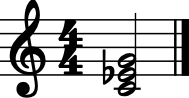

In [11]:
# Ejemplo. Un acorde Do menor
cMinor = music21.chord.Chord(["C","E-","G"])
# modifico la duración a media o blanca
cMinor.duration.type = 'half'
streamC = music21.stream.Stream()
#streamC.append(music21.note.Rest(quarterLength = .25))
streamC.append(cMinor)
print('Notas del acorde:',cMinor.pitches)
streamC.show()
streamC.show('midi')

Podemos obtener diferente tipo de información de un acorde. Por ejemplo, su nombre y el tipo (mayor, menor, séptima, etcétera).

In [12]:
# nombre del acorde
print('nombre comun:',cMinor.commonName)
print('nombre completo:', cMinor.fullName)
# notas de los acordes
for i in range(1,8):
    if cMinor.getChordStep(i) is None:
        print('Nota {}a {}'.format(i,'None'))
    else:
        print('Nota {}a {}'.format(i,cMinor.getChordStep(i)))


nombre comun: minor triad
nombre completo: Chord {C | E-flat | G} Half
Nota 1a C
Nota 2a None
Nota 3a E-
Nota 4a None
Nota 5a G
Nota 6a None
Nota 7a None


Hay varias formas de expresar un acorde. Por ejemplo:

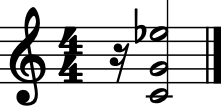

nombre comun: minor triad
nombre completo: Chord {C | E-flat in octave 5 | G} Half
Nota 1a C
Nota 2a None
Nota 3a E-5
Nota 4a None
Nota 5a G
Nota 6a None
Nota 7a None


In [13]:
cMinor2 = music21.chord.Chord(["C","E-5","G"])
cMinor2.duration.type = 'half'
streamC = music21.stream.Stream()
streamC.append(music21.note.Rest(quarterLength = .25))
streamC.append(cMinor2)
streamC.show()
streamC.show('midi')
# nombre del acorde
print('nombre comun:',cMinor2.commonName)
print('nombre completo:', cMinor2.fullName)
# notas de los acordes
for i in range(1,8):
    if cMinor2.getChordStep(i) is None:
        print('Nota {}a {}'.format(i,'None'))
    else:
        print('Nota {}a {}'.format(i,cMinor2.getChordStep(i)))


También, podemos verificar si tiene algún tipo de inversión. Pero... ¿qué es una inversión de un acorde? 😮

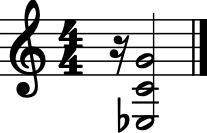

Inversion del acorde: 1


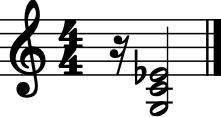

Inversion del acorde: 2


In [15]:
cMinor3 = music21.chord.Chord(["E-3",'C4',"G4"])
cMinor3.duration.type = 'half'
streamC = music21.stream.Stream()
streamC.append(music21.note.Rest(quarterLength = .25))
streamC.append(cMinor3)
streamC.show()
print('Inversion del acorde:', cMinor3.inversion())

cMinor4 = music21.chord.Chord(['G3','C4','E-'])
cMinor4.duration.type = 'half'
streamC = music21.stream.Stream()
streamC.append(music21.note.Rest(quarterLength = .25))
streamC.append(cMinor4)
streamC.show()
print('Inversion del acorde:', cMinor4.inversion())

Todos juntos. Abajo se muestra la inversión del acorde.

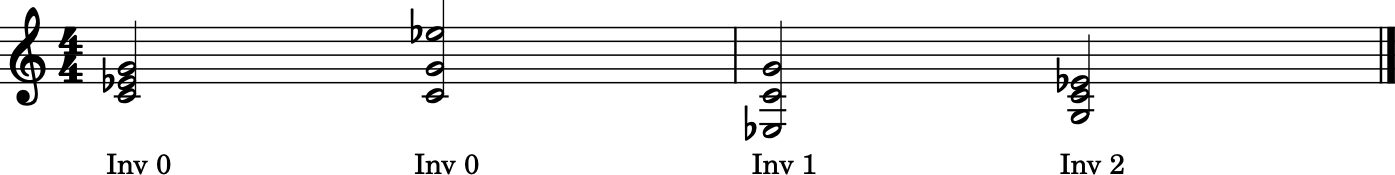

In [16]:
cMinor.lyric = 'Inv {}'.format(cMinor.inversion())
cMinor2.lyric = 'Inv {}'.format(cMinor2.inversion())
cMinor3.lyric = 'Inv {}'.format(cMinor3.inversion())
cMinor4.lyric = 'Inv {}'.format(cMinor4.inversion())
streamC = music21.stream.Stream()
#streamC.append(music21.note.Rest(quarterLength = .25))
streamC.append(cMinor)
streamC.append(cMinor2)
streamC.append(cMinor3)
streamC.append(cMinor4)
streamC.show()
streamC.show('midi')

Finalmente, podemos también asignar la **clave** de la tonalidad al acorde. Esto se realiza con la clase `KeySignature` del módulo `key`.

Para esto, usamos una clase de stream llamado `Measure`, definida también en el módulo `stream`, y que hereda características de la clase `Stream` que ya manejamos.

En el siguiente ejemplo, veremos cómo asignar la tonalidad, y otras características interesantes.

Primero, creamos una clave de la tonalidad. Esta puede definirse usando *armaduras* de sostenidos o bemoles. Supongamos que queremos mostrar el acorde La Mayor. Esto puede realizarse con *alteraciones accidentales*, es decir, sin armaduras:

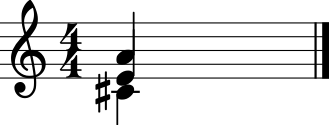

In [41]:
aMaj = music21.chord.Chord(['A4','C#4','E4'])
streamA = music21.stream.Stream(aMaj)
streamA.show()

y también con armaduras de sostenidos:

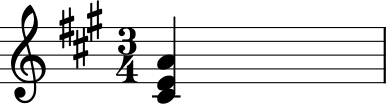

In [42]:
# creamos una keySignature con 3 sostenidos para la clave de La mayor
ks = music21.key.KeySignature(3)
ks.sharps

# definimos un tiempo para cada compas
ts = music21.meter.TimeSignature('3/4')

# creamos un stream Measure
m = music21.stream.Measure()

# agregamos todo
m.insert(0,ts)
m.insert(0,ks)
m.append(aMaj)
m.show()


Podemos hacerlo también para armaduras con bemoles. Por ejemplo, para la clave de La bemol Mayor:

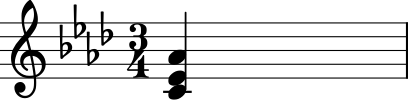

In [43]:
# creamos una keySignature con 4 bemoles para la clave de La mayor bemol
ks2 = music21.key.KeySignature(-4)

# definimos un tiempo para cada compas
ts2 = music21.meter.TimeSignature('3/4')

# creamos un stream Measure
m2 = music21.stream.Measure()

aMajB = music21.chord.Chord(['A-','C','E-'])

# agregamos todo
m2.insert(0,ts2)
m2.insert(0,ks2)
#m2.KeySignature = ks2
m2.append(aMajB)
m2.show()


Como curiosidad adicional... ¿qué pasa si no especificamos correctamente las notas del acorde según su clave (armadura)?

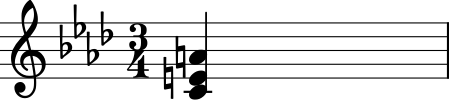

In [44]:
# creamos una keySignature con 4 bemoles para la clave de La mayor bemol
ks2 = music21.key.KeySignature(-4)

# definimos un tiempo para cada compas
ts2 = music21.meter.TimeSignature('3/4')

# creamos un stream Measure
m3 = music21.stream.Measure()

# supon que solo se las notas del acorde La, pero no se sus 'Accidentals', es decir, los sostenidos
# o bemoles correspondientes a su armadura
aMajB2 = music21.chord.Chord(['A','C','E'])

# agregamos todo
m3.insert(0,ts2)
m3.insert(0,ks2)
m3.KeySignature = ks2
m3.append(aMajB2)
m3.show()

Observa que, al no especificar las alteraciones (Accidentals) de las notas, éstas se "deshacen" con el becuadro.
Para hacer que se pongan automáticamente, especificando solamente la clave del acorde, podemos hacer lo siguiente (no es dificil de entender el código...)

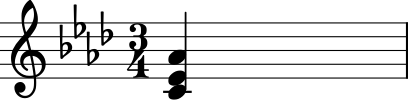

In [45]:
for n in aMajB2.notes:  # acceder a cada objeto Note del stream
    nStep = n.pitch.step
    rightAccidental = ks2.accidentalByStep(nStep)
    n.pitch.accidental = rightAccidental
m3.show()

Ahora, ya nos puso correctas las notas según la clave del acorde! 👏 🙌 

### - Archivos MIDI

MIDI (Musical Instrument Digitl Interface)  "*is a technical standard that describes a communications protocol, digital interface, and electrical connectors that connect a wide variety of electronic musical instruments, computers, and related audio devices for playing, editing and recording music*" (Wikipedia).

En términos prácticos, podemos decir que es una forma de especificar instrucciones para crear o reproducir música. Estas instrucciones contienen toda la información necesaria, como notas, pitches, tiempos, etcétera. En `music21` podemos manipular archivos MIDI mediante el módulo `midi` 

In [46]:
import os
from music21 import converter, corpus, instrument, midi, note, chord, pitch

os.chdir('/home/victor/cursos/optativa2019/')
#midi_path = "data/midis"
#midi_folder = "pop_midi"

OJO: La versión 6.1.0 de music21 tiene un bug cuando leé archivos MIDI. Luego de mucho buscar, encontré la solución más fácil (mientras se libera la nueva versión oficial), que consiste en sustituir una línea de `music21/midi/translate.py` según se muestra en
Ver https://stackoverflow.com/questions/64132939/unicodedecodeerror-utf-8-codec-cant-decode-byte-0xa9-in-position-10-invalid

An answer I got from the music21 Google Groups and fixed my problem :

HI, and thanks for the report. This is a regression caused by a new feature in 6.1.0 that creates Instrument objects from the text of MIDI track names. It's fixed in the next unreleased version (likely to be 6.2.0), which is available now on GitHub. If that's too cumbersome to install, you can also just edit your own copy of music21 to apply the fix found here: https://github.com/cuthbertLab/music21/pull/607/files

Buscar la función `def midiEventsToInstrument(eventList):` y sustituir la línea:

except instrument.InstrumentException:  # pragma: no cover

por

except (instrument.InstrumentException, UnicodeDecodeError):  # pragma: no cover

Luego, reiniciar el kernel (si es necesario).

In [ ]:
from importlib.metadata import version
version('music21')

In [47]:
base_midi = converter.parse('data/midis/classic_piano/grieg/grieg_butterfly.mid')
base_midi

<music21.stream.Score 0x7fc2cfdb3970>

In [48]:
base_midi.show('text')

{0.0} <music21.stream.Part 0x7fc2cfe59d60>
    {0.0} <music21.instrument.Piano 'Piano right'>
    {0.0} <music21.instrument.Piano 'Piano'>
    {0.0} <music21.tempo.MetronomeMark animato Quarter=120.73>
    {0.0} <music21.key.Key of A major>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.note.Note F#>
    {0.75} <music21.note.Note G#>
    {1.0} <music21.tempo.MetronomeMark allegro moderato Quarter=128.23>
    {1.0} <music21.note.Note A>
    {1.25} <music21.tempo.MetronomeMark allegro moderato Quarter=128.73>
    {1.25} <music21.note.Note B->
    {1.5} <music21.tempo.MetronomeMark allegro moderato Quarter=129.23>
    {1.5} <music21.note.Note B>
    {1.75} <music21.tempo.MetronomeMark allegro moderato Quarter=129.73>
    {1.75} <music21.note.Note C>
    {2.0} <music21.tempo.MetronomeMark allegro Quarter=130.23>
    {2.0} <music21.note.Note C#>
    {2.25} <music21.tempo.MetronomeMark allegro Quarter=130.73>
    {2.25} <music21.note.Note D>
    {2.5} <music21.tempo.Metronome

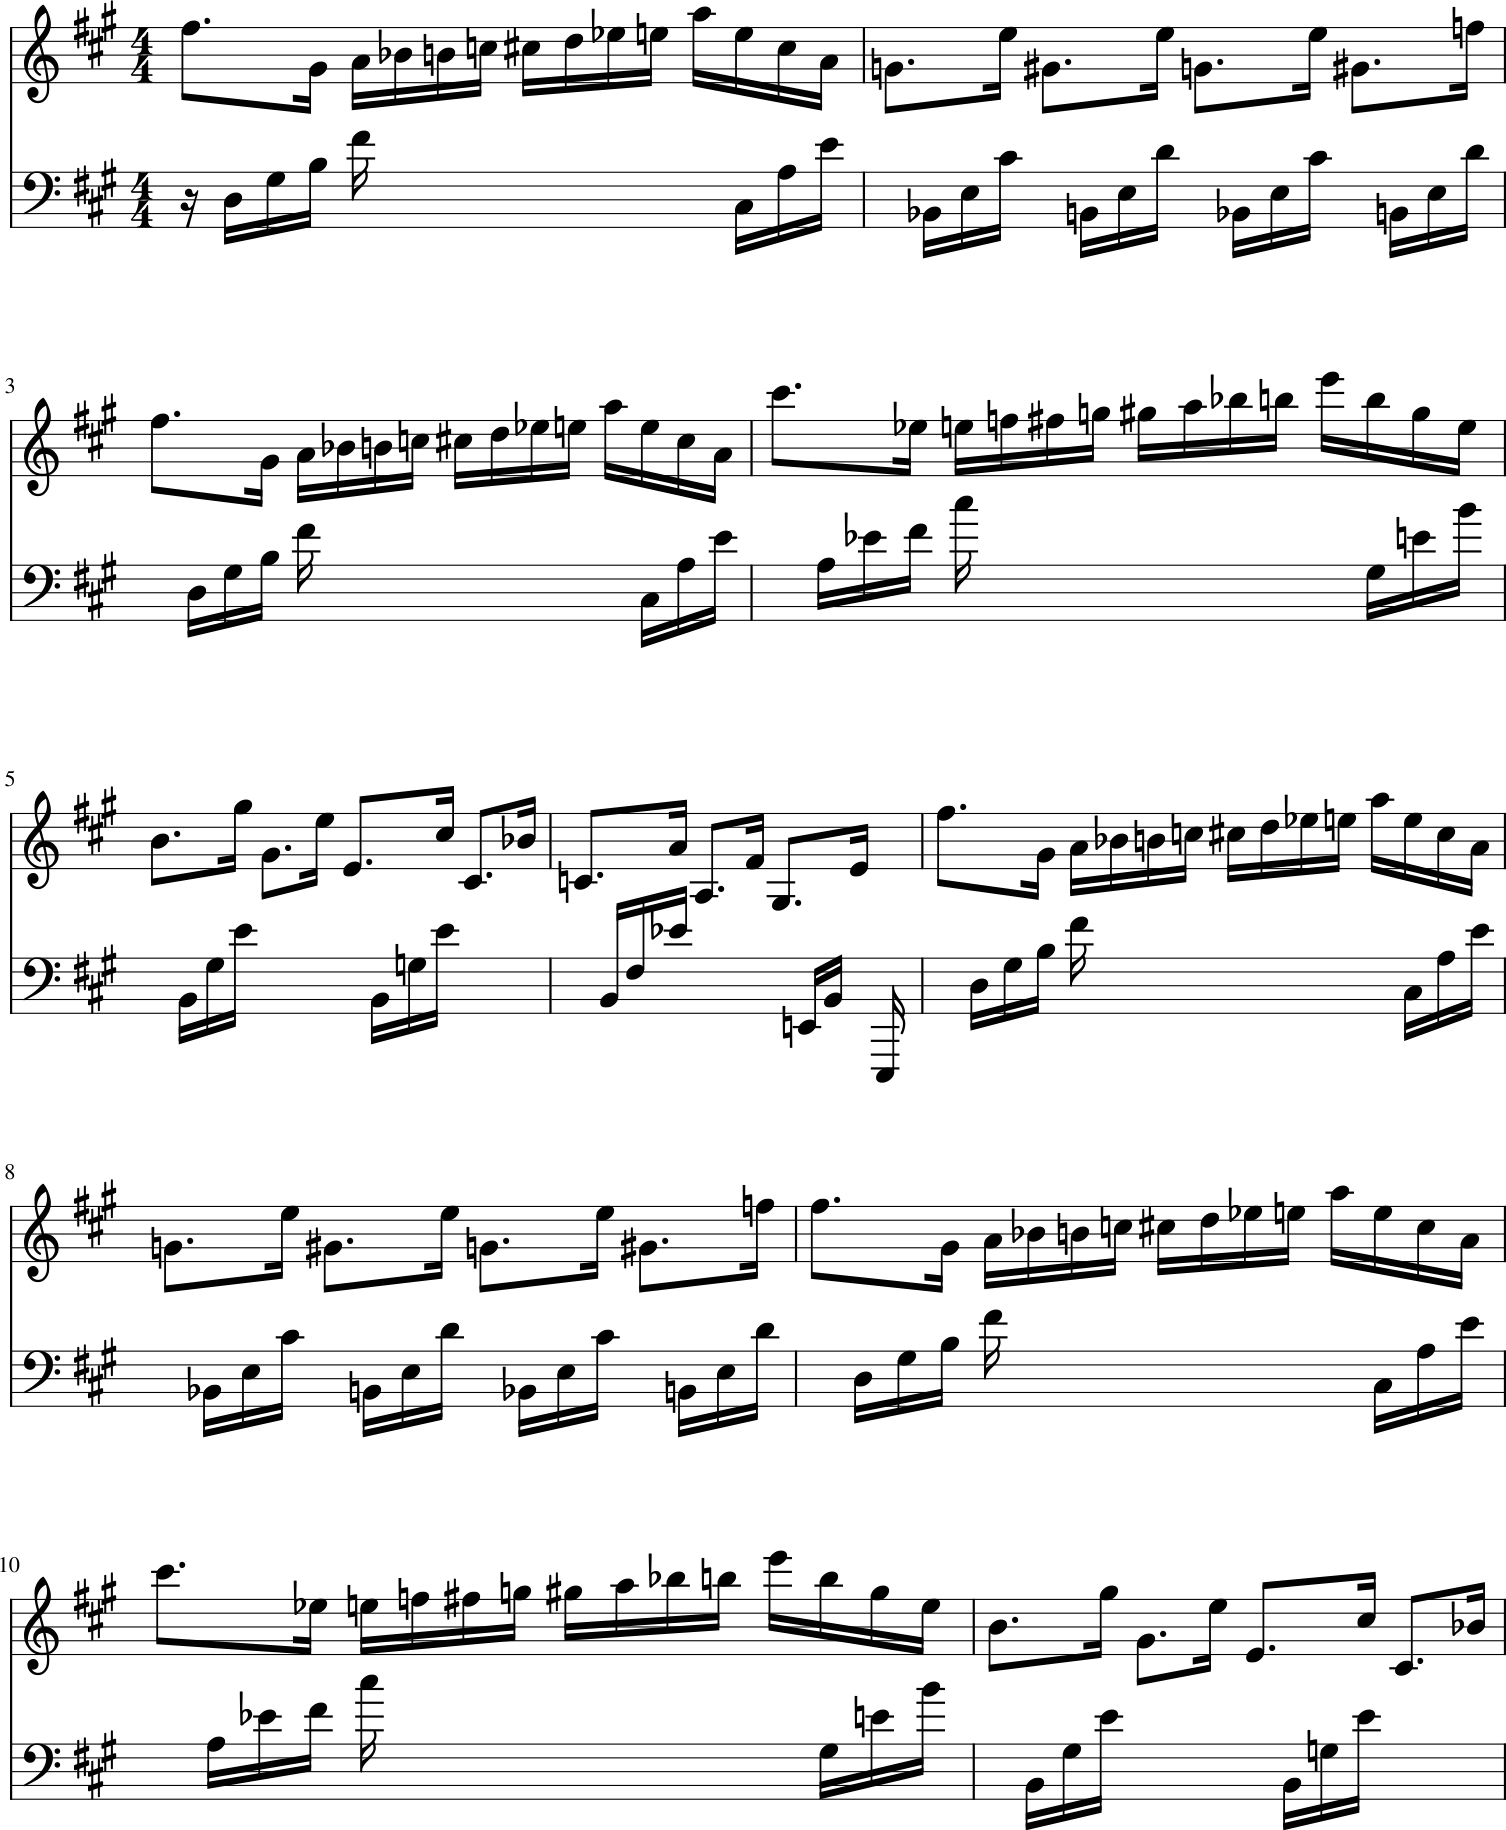

In [49]:
base_midi.show()

In [50]:
base_midi.show('midi')

Piano right
Piano left
Mostrando parte: Piano left 2


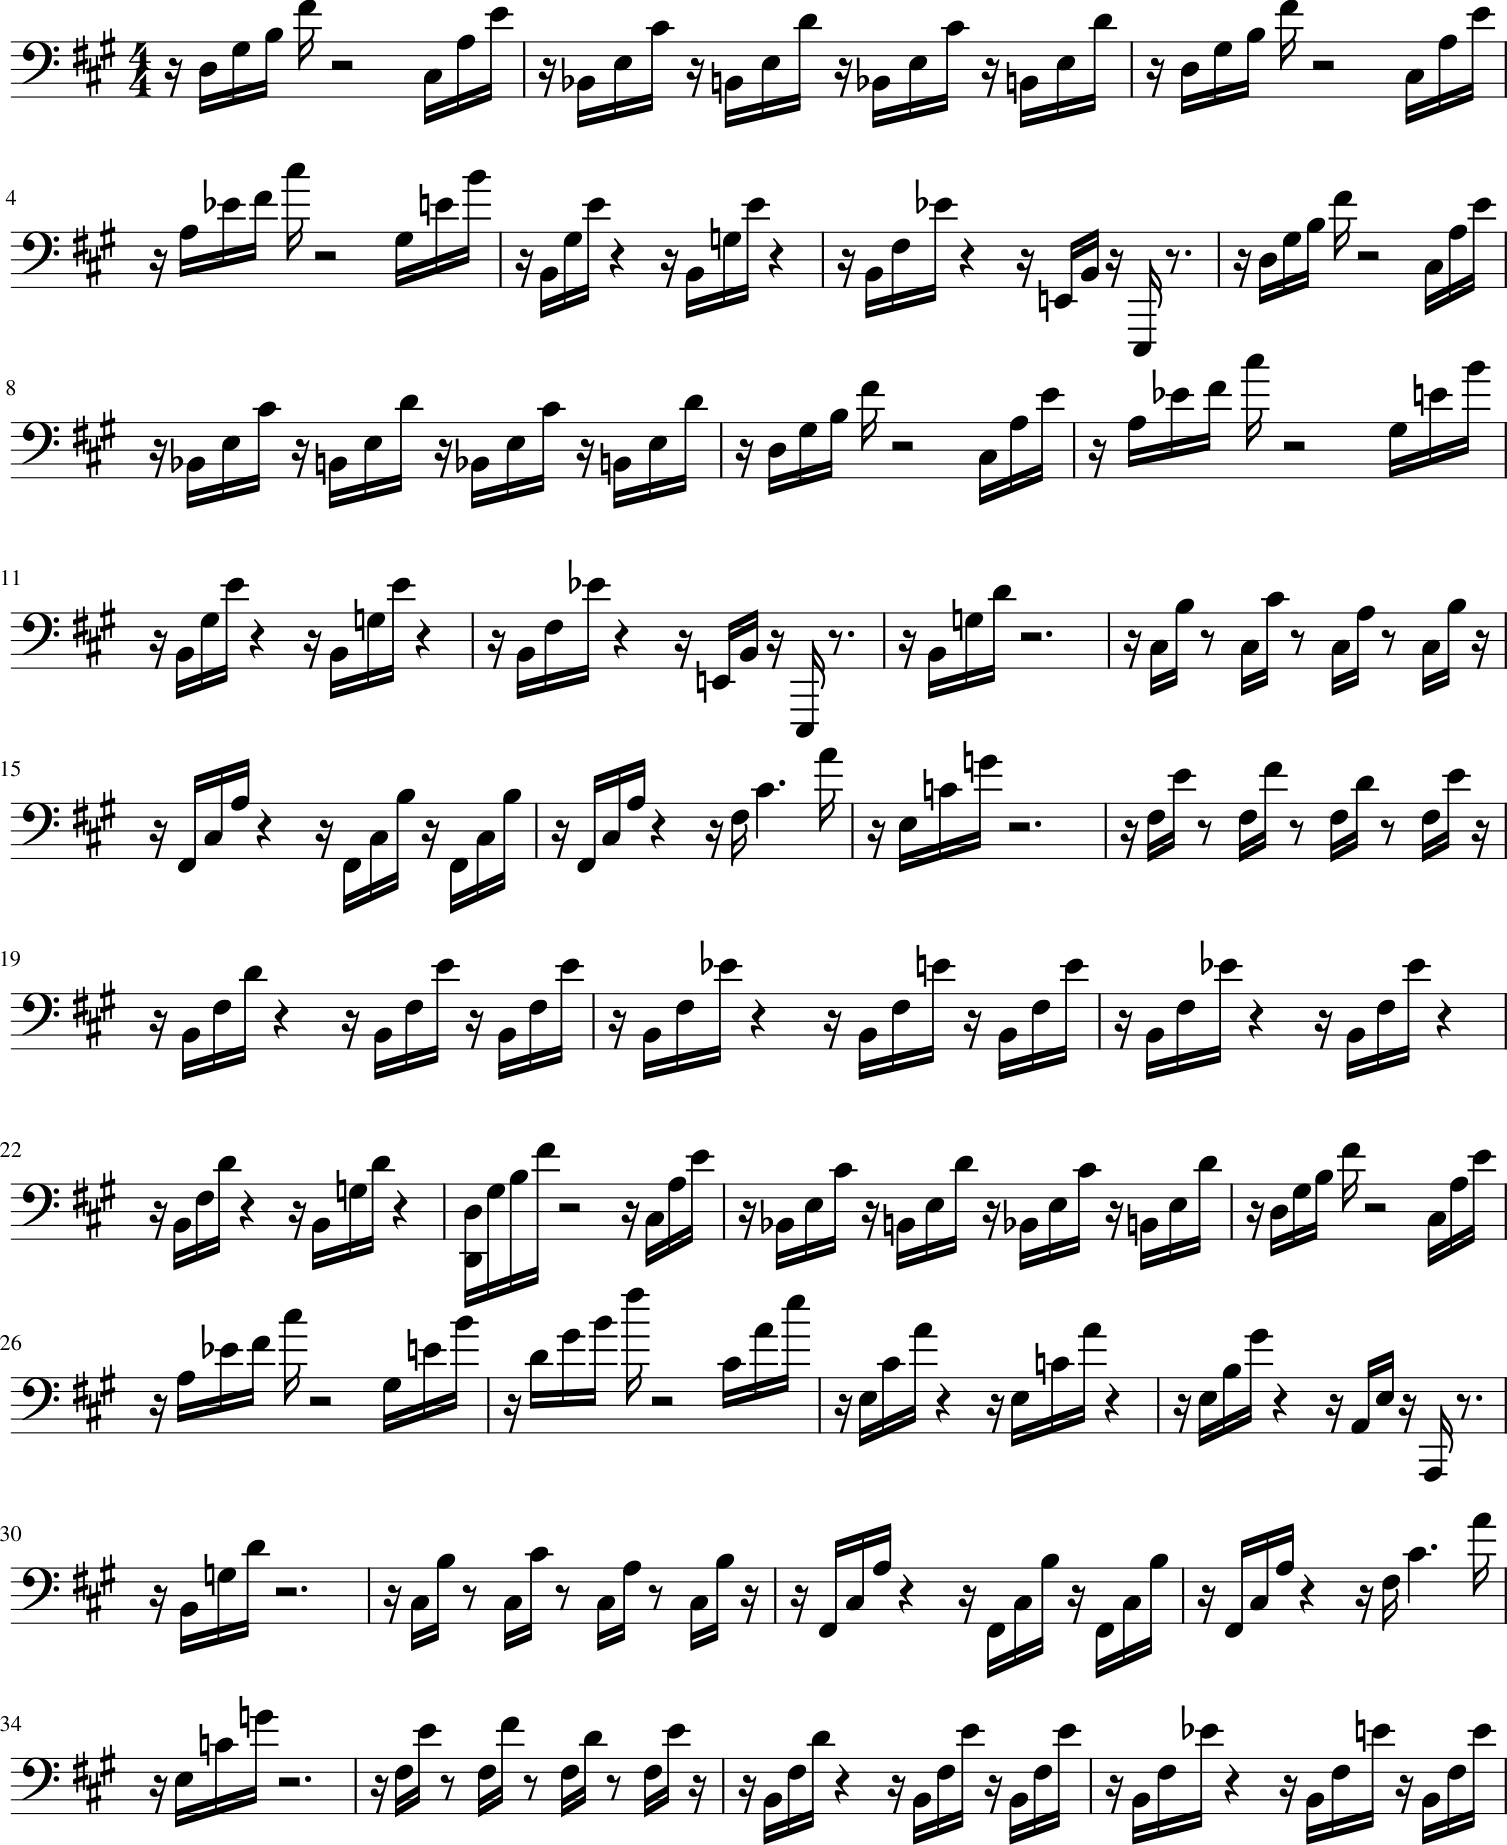

In [52]:
p = base_midi.parts.stream()
for pp in p:
    print (pp.partName)

aa = 1
print('Mostrando parte:',p[aa].partName,aa+1)
p[aa].show()
p[aa].show('midi')

Algunas veces, no funciona bien si la decodificación no se realiza correctamente, o la estructura del MIDI tiene algunos errores o no es compatible.

meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/continue>>, <music21.beam.Beams <music21.beam.Beam 1/continue>>, <music21.beam.Beams <music21.beam.Beam 1/stop>>, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 5 of 
[None, None, None, None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Bea

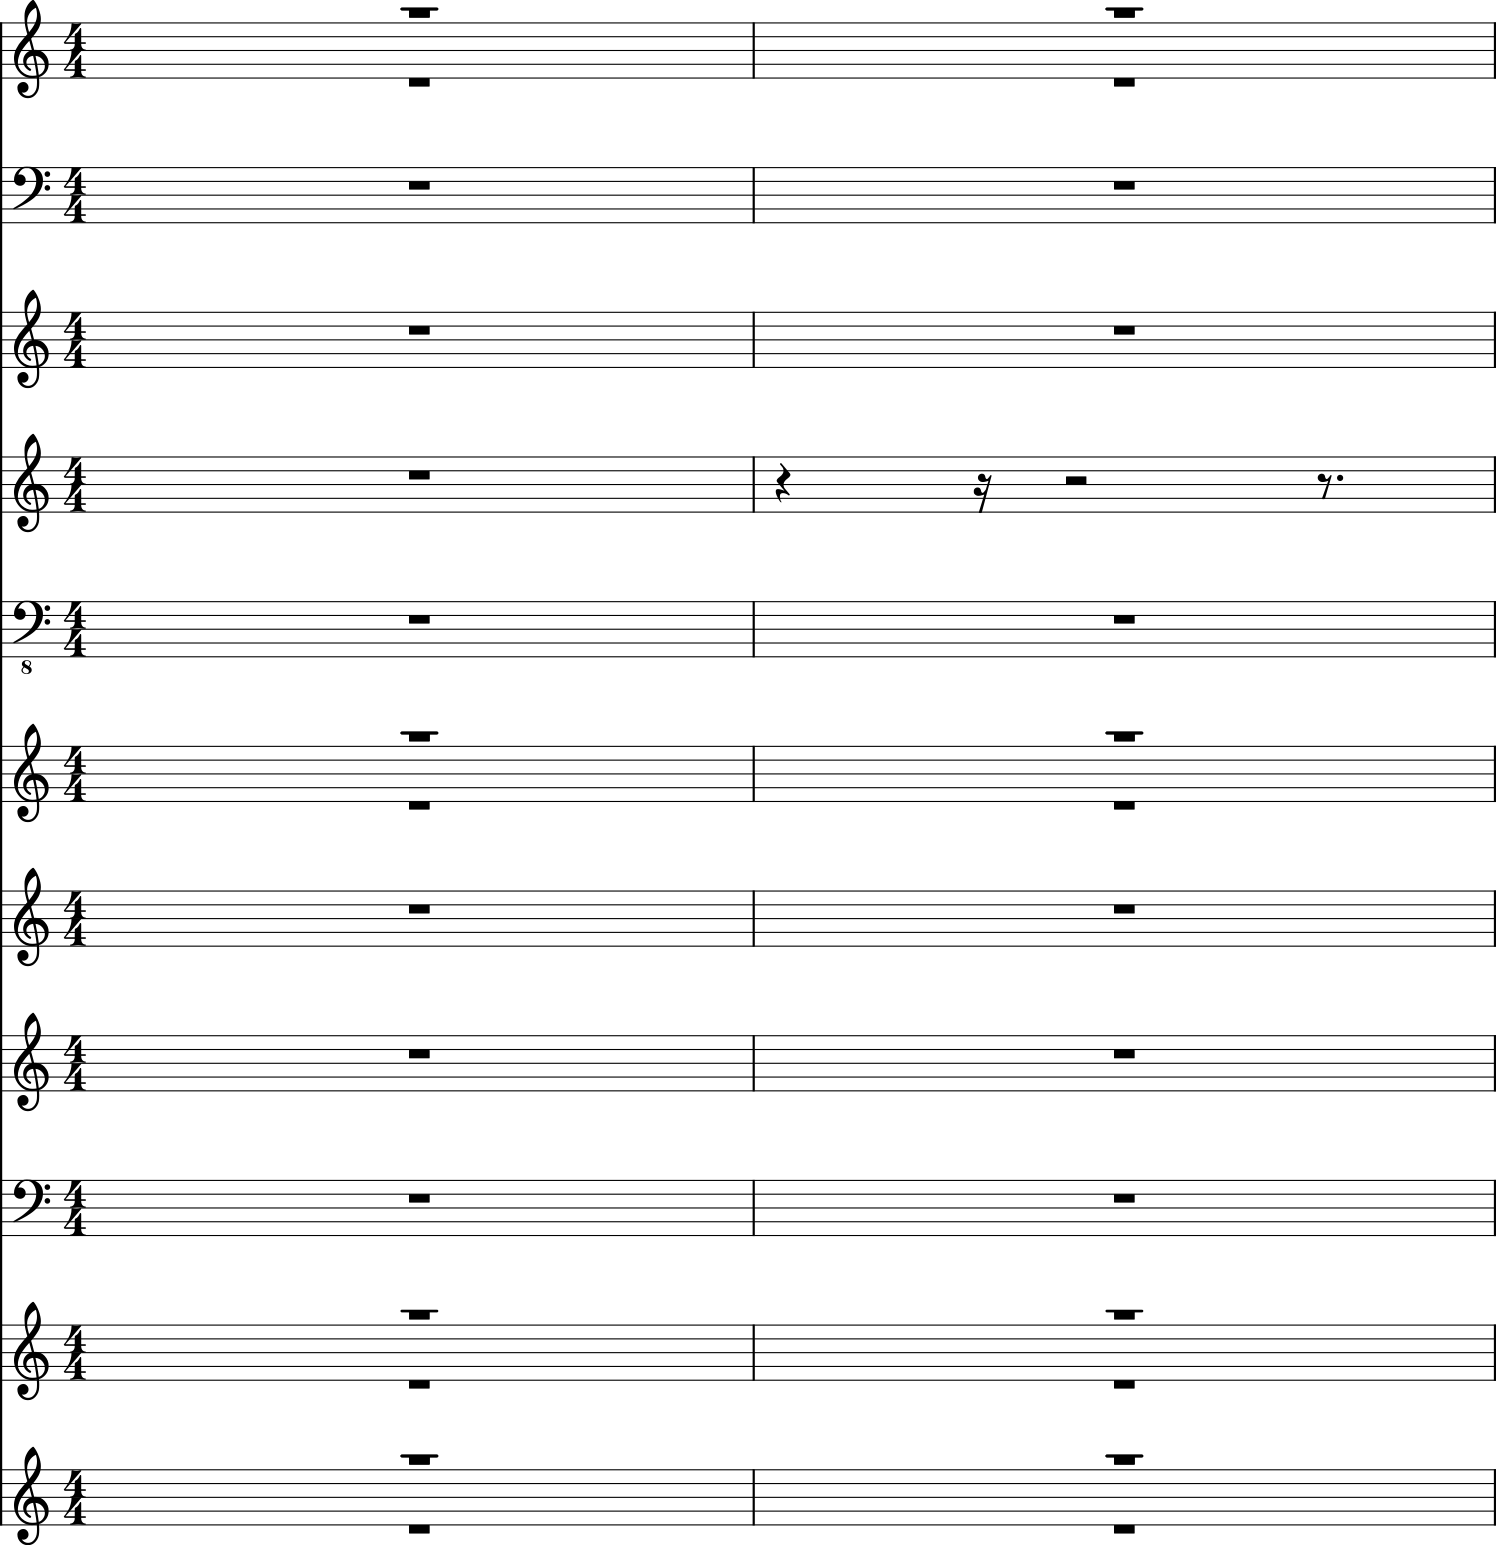

In [58]:
base_midi2 = converter.parse('data/midis/clean_midi/Stansfield Lisa/All Around the World.mid')
base_midi2  
base_midi2.show()

In [54]:
p = base_midi2.parts.stream()
for pp in p:
    print (pp.partName)

None
FRETLESS
Piano
None
SYN BASS 2
None
TUBA
VIOLIN
None
None
StringInstrument


Mostrando parte: None 1


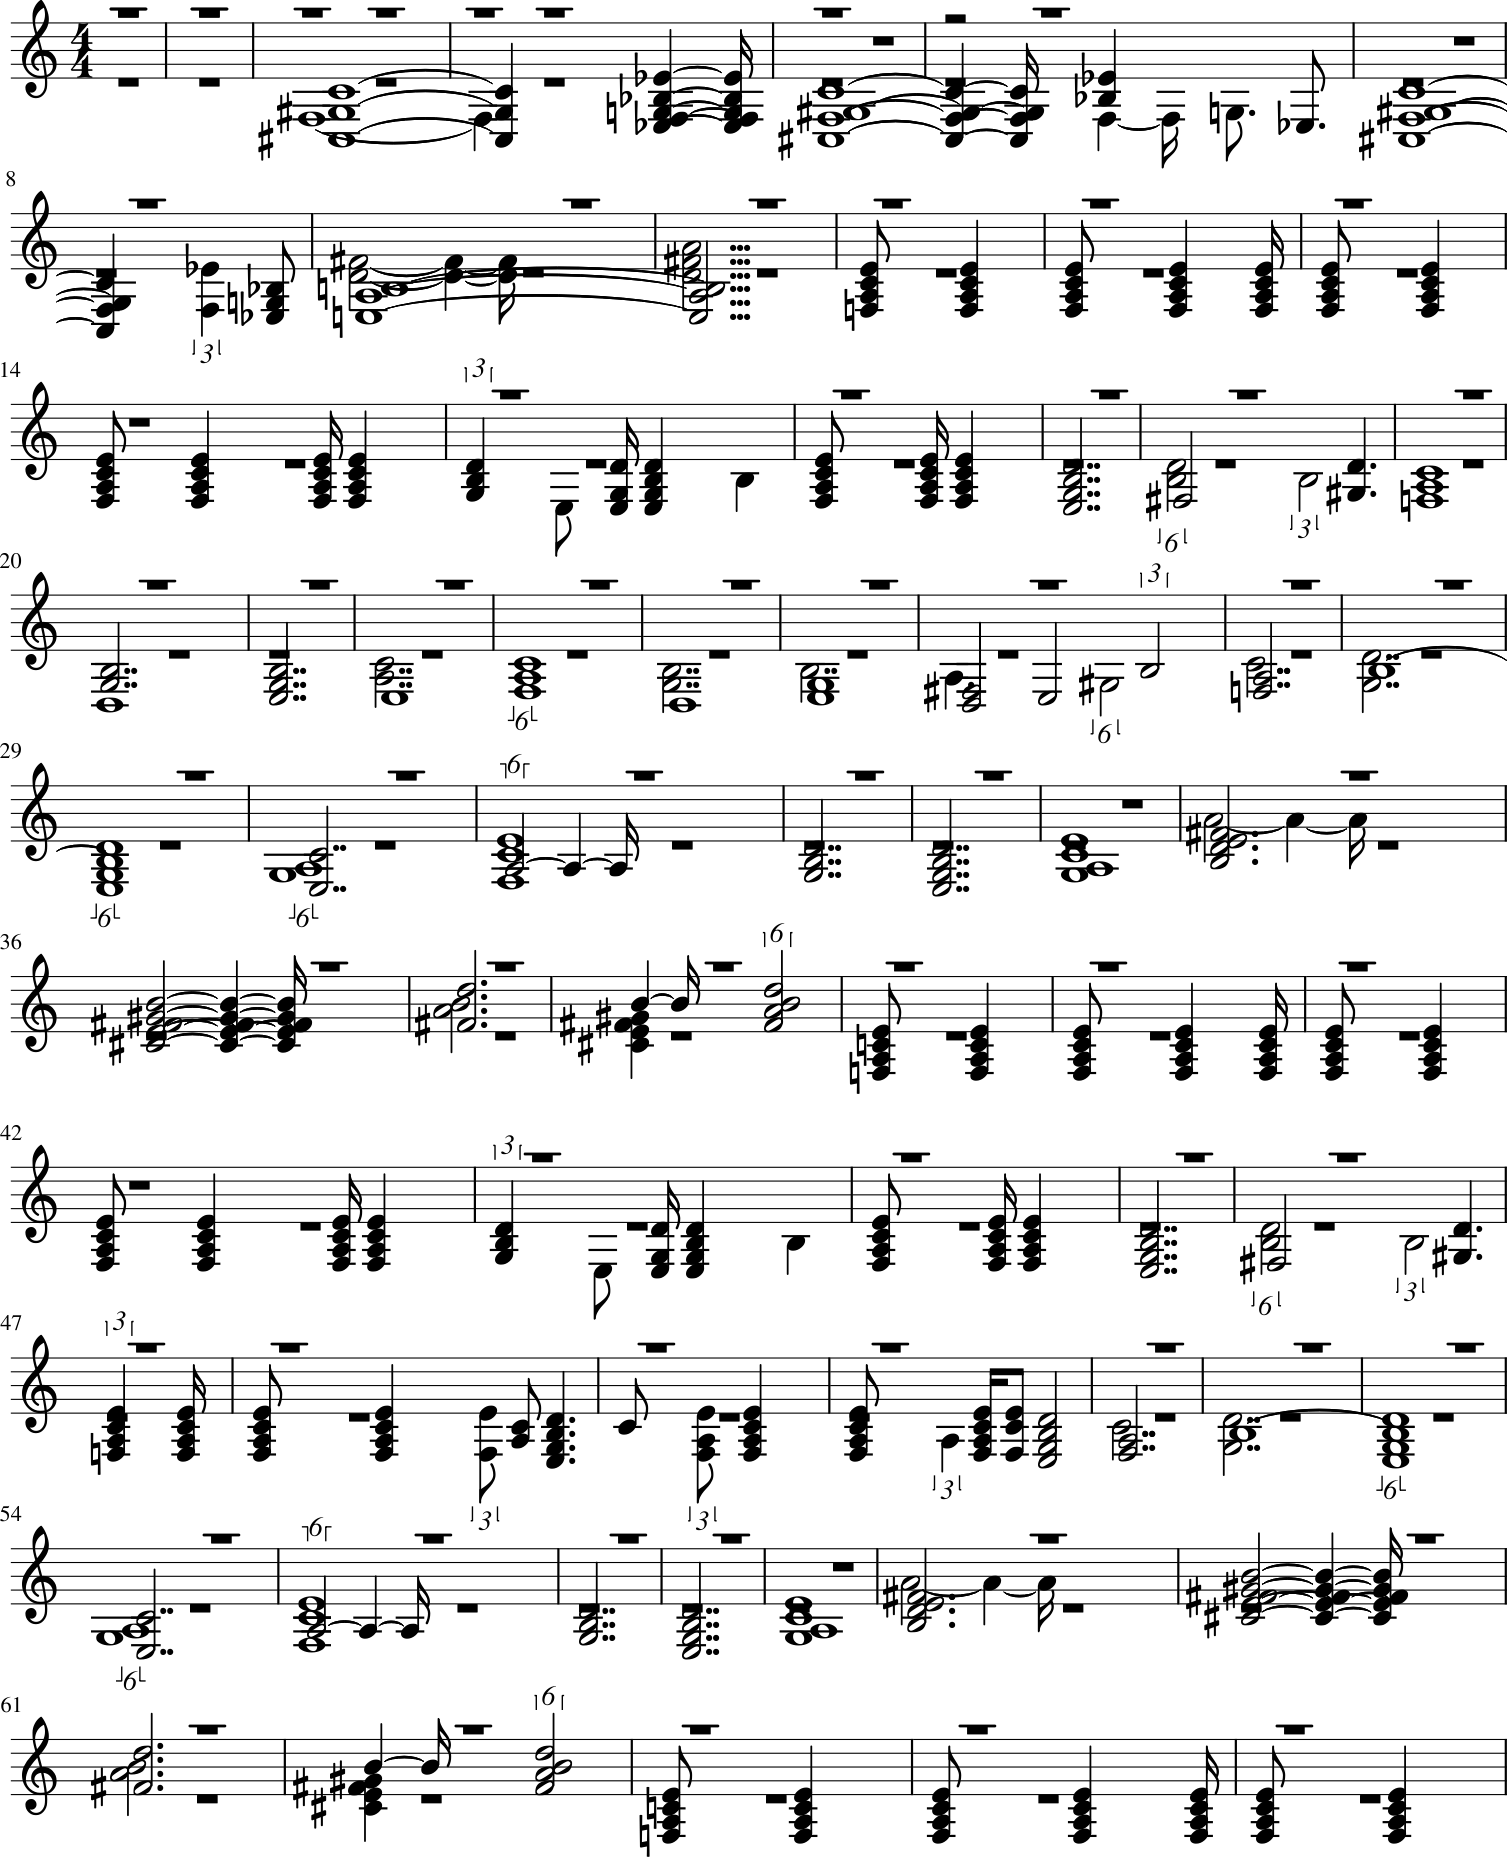

In [55]:
aa = 0
print('Mostrando parte:',p[aa].partName,aa+1)
p[aa].show()

In [59]:
p[aa].show('midi')